# Wilson and Cowan Model

This notebook illustrates how to generate the necessary NeuroML2/LEMS file and plot the isoclines of the simulation. For the case where there is **no drive** (no external input current is applied to the system) and **driven** when an external current is applied to the system.

## No Drive

In [1]:
from __future__ import division # helps ensure no errors with integer division

The code below generates the NeuroML/LEMS file with the Wilson and Cowan definition.

In [2]:
# need to move to NeuroML directory in order to do run the python script
% cd ../NeuroML2
# The file GenerateWilsonCowanLEMS will generate the NeuroML2/LEMS definition
# of the Wilson and Cowan model

! python GenerateWilsonCowanLEMS.py -ie0 0 -ii0 0 -dims

/Users/padraig/neuroConstruct/osb/cerebral_cortex/networks/WilsonCowan/NeuroML2
Generating a dimensionless model: False
Written NeuroML file: WC_slow.net.nml
pyNeuroML >>> Written LEMS Simulation WC_slow to file: LEMS_WC_slow.xml


Run pynml to simulate the defined NeuroML2/LEMS file

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

no_drive_lems_file='LEMS_WC_slow.xml'
no_drive_results = pynml.run_lems_with_jneuroml(no_drive_lems_file, nogui=True, load_saved_data=True, plot=False)

pyNeuroML >>> Reloading data specified in LEMS file: LEMS_WC_slow.xml (/Users/padraig/neuroConstruct/osb/cerebral_cortex/networks/WilsonCowan/NeuroML2/LEMS_WC_slow.xml), base_dir: ., cwd: /Users/padraig/neuroConstruct/osb/cerebral_cortex/networks/WilsonCowan/NeuroML2


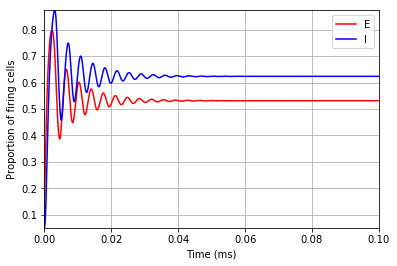

In [4]:
plt.plot(no_drive_results['t'], no_drive_results['ExcPop/0/Exc/r'], label='E', color='r')
plt.plot(no_drive_results['t'], no_drive_results['InhPop/0/Inh/r'], label='I', color='b')
plt.xlabel('Time (ms)')
plt.ylabel('Proportion of firing cells')
plt.legend()
plt.grid(True)
plt.margins(0)

## Driven 

In the driven case an external input current is added to the system. 

In [5]:
# Generates the NeuroML2/LEMS definition for the Wilson and Cowan model
# for the driven case
! python GenerateWilsonCowanLEMS.py -ie0 0.5 -ii0 0.5 -dims

Generating a dimensionless model: False
Written NeuroML file: WC_driven.net.nml
pyNeuroML >>> Written LEMS Simulation WC_driven to file: LEMS_WC_driven.xml


In [6]:
# Run the simulation of the just generated using jneuroml 
driven_lems_file='LEMS_WC_driven.xml'
driven_results = pynml.run_lems_with_jneuroml(driven_lems_file, nogui=True, load_saved_data=True, plot=False)

pyNeuroML >>> Reloading data specified in LEMS file: LEMS_WC_driven.xml (/Users/padraig/neuroConstruct/osb/cerebral_cortex/networks/WilsonCowan/NeuroML2/LEMS_WC_driven.xml), base_dir: ., cwd: /Users/padraig/neuroConstruct/osb/cerebral_cortex/networks/WilsonCowan/NeuroML2


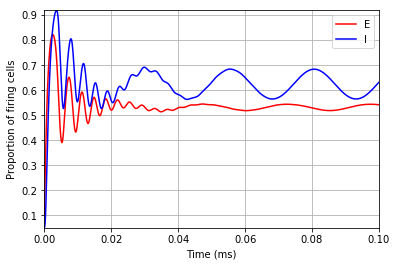

In [7]:
plt.plot(driven_results['t'], driven_results['ExcPop/0/Exc/r'], label='E', color='r')
plt.plot(driven_results['t'], driven_results['InhPop/0/Inh/r'], label='I', color='b')
plt.xlabel('Time (ms)')
plt.ylabel('Proportion of firing cells')
plt.legend()
plt.grid(True)
plt.margins(0)

# Phase Plane Analysis

Phase Plane analysis can be used to investigate the population response to different stimuli. Following the description from the [Wilson and Cowan, 1972](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1484078), we plotted the isoclines for the no drive version of the current model.

The dynamics of the NEURON simulation are defined as:
$$
\tau \frac{dI}{dt} = -v + \phi (w_{ei}\cdot u - w_{ii} \cdot v - z_i)
$$
$$
\tau \frac{dE}{dt} = -u + \phi (w_{ee} \cdot u - w_{ei} \cdot v - z_e)
$$

therefore the progression over time for the excitatory and inhibitory population for $\frac{dE}{dt} = 0$ and $ \frac{dE}{dt} = 0$, respectively are
$$
v = \frac{1}{w_{ie}} \Big( \log(\frac{1}{u} - 1) - z_e + w_{ee} \cdot u \Big) 
$$
$$
u = - \frac{1}{w_{ei}} \Big( \log(\frac{1}{v} - 1) - z_i + w_{ii} \cdot v \Big)
$$
 


Text(0,0.5,'E')

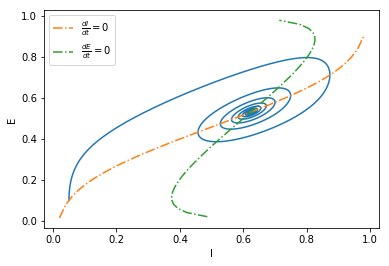

In [8]:
import numpy as np
import math

# The following parameters are defined according to the NEURON model 
# and are specified in the WC_parameters.xml file and on GenerateWilsonCowanLEMS
wee = 10.; wei = 12;
wie = 8.; wii = 3.;
w_to_from_pops = np.array([[wee, wei],
                           [wie, wii]])
ze = .2; zi = 4.

pop_step = .02
pop_stop = 1
population = np.arange(pop_step, pop_stop, pop_step)
I = np.zeros((len(population), 1))
E = np.zeros((len(population), 1))

# To calculate the isoclines, we set the time derivates of the model to 0 and solve for both E and I.
for e_idx, e in enumerate(population):
    I[e_idx] = 1./ wie * (math.log(1./e - 1) - ze + wee * e)

for i_idx, i in enumerate(population):
    E[i_idx] = - 1. / wei * (math.log(1./i - 1) - zi - wii * i)


plt.plot(no_drive_results['InhPop/0/Inh/r'], no_drive_results['ExcPop/0/Exc/r'])
plt.plot(population, E, label=r'$\frac{dI}{dt}=0$', linestyle='-.')
plt.plot(I, population, label=r'$\frac{dE}{dt}=0$', linestyle='-.')
plt.legend(loc='upper left')
plt.xlabel('I')
plt.ylabel('E')

The dotted lines in the plot above correspond to the isoclines of the excitatory and inhibitory population. The intersection between the isoclines represent the steady-state solutions in the system. With the current sets of parameters, the system has one single steady state. 

The line in blue represents the dynamics of the system.  

## Further Analysis

In order to further explore the dynamics of the model, we also analysed different sets of parameters (so far only available on the Python implementation). To see some of the possible combinations tested and their generated dynamics run `run_WilsonCowan.sh` on the `Python` folder of this repo.